In [62]:
#  Try it out !
# Uncomment the code to run this cell
# Code Below
# Calculating Conditional Probability using Bayes Theorem :-
#---------------------------------------------------------------------------------------------------------------------------

# P_A = float(input("Enter the probability of event A =  "))  # Probability of event A
# P_B_given_A = float(input("Enter the probability of event B given event A =  "))  # Probability of event B given event A

# # Calculate the complement of event A
# P_not_A = 1 - P_A

# # Calculate the probability of event B
# P_B = P_B_given_A * P_A + (1 - P_B_given_A) * P_not_A

# # Calculate the conditional probability using Bayes' theorem
# P_A_given_B = (P_B_given_A * P_A) / P_B

# # Print the results
# print(f"P(A|B) = {P_A_given_B:.2f}")

In [63]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
# Reading the data from .csv file
data = pd.read_csv('spam.csv', encoding='latin-1')

In [65]:
#display the first 5 rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [66]:
# Drop the columns with NaN values
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [67]:
# Rename columns for clarity:
data.columns = ['label', 'text']

In [68]:
# Displaying the first 5 rows to get basic understanding of the data
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
# Separate features (X) and target labels (y)
X =  data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [ ]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13941 stored elements and shape (1115, 7735)>
  Coords	Values
  (0, 1808)	1
  (0, 2759)	1
  (0, 3067)	1
  (0, 3337)	1
  (0, 3567)	1
  (0, 3873)	1
  (0, 4685)	1
  (0, 4773)	1
  (0, 4776)	1
  (0, 7040)	1
  (0, 7482)	1
  (1, 923)	1
  (1, 955)	1
  (1, 1036)	1
  (1, 1987)	1
  (1, 2023)	1
  (1, 2375)	2
  (1, 2731)	1
  (1, 2836)	1
  (1, 2954)	1
  (1, 3298)	1
  (1, 3415)	1
  (1, 3600)	1
  (1, 3739)	1
  (1, 3837)	1
  :	:
  (1111, 7152)	1
  (1111, 7386)	1
  (1111, 7425)	1
  (1112, 3361)	1
  (1112, 4495)	1
  (1112, 4614)	1
  (1112, 6251)	2
  (1112, 6763)	1
  (1112, 6781)	1
  (1112, 7475)	1
  (1112, 7662)	1
  (1112, 7679)	1
  (1113, 2422)	1
  (1113, 3129)	1
  (1113, 3416)	1
  (1113, 6786)	1
  (1114, 305)	1
  (1114, 1292)	1
  (1114, 1353)	1
  (1114, 1454)	1
  (1114, 3361)	1
  (1114, 4235)	1
  (1114, 4723)	1
  (1114, 5247)	1
  (1114, 7679)	1


In [73]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [74]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



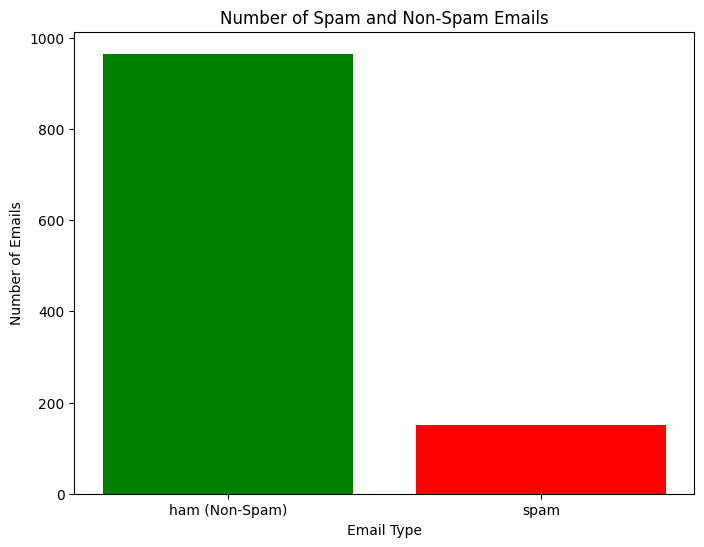

In [75]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()